In [4]:
from master_lib.utils import files_and_directories
dataset_path = r'C:\Users\MikołajStryja\Documents\Studia\master\dataset.json'
dataset = files_and_directories.load_json(dataset_path)
dataset_images = r'C:\Users\MikołajStryja\Documents\Studia\siim-covid19-detection'
dataset = files_and_directories.load_json(dataset_path)
train_imgs = files_and_directories.list_train_images(dataset_images)

In [11]:
from master_lib.image_processing.processing import load_data_as_numpy_arr, resize

In [12]:
A = load_data_as_numpy_arr(train_imgs[55], do_resize=False)

In [13]:
A.shape
# y, x -> ZAPAMIETAC - czyli inaczej -> najpierw wiersze potem kolumny

(2336, 2836)

Text(0.5, 1.0, '9027e541f1f3 original')

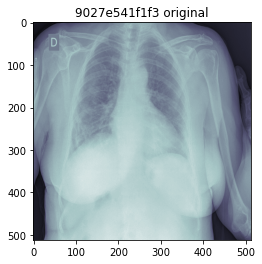

In [14]:
import matplotlib.pyplot as plt
plt.imshow(resize(A, 512), cmap=plt.cm.bone)
plt.title(os.path.basename(train_imgs[55].split('.')[0]) + ' original')

In [15]:
import skimage
from skimage import exposure

In [26]:
img_eq = exposure.equalize_hist(A)
img_eq = img_eq*255

Text(0.5, 1.0, '9027e541f1f3 histogram equalization')

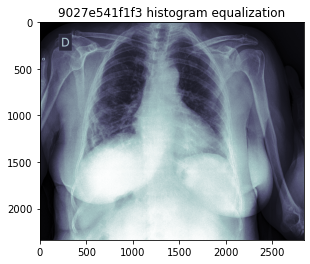

In [27]:
plt.imshow(img_eq, cmap=plt.cm.bone)
plt.title(os.path.basename(train_imgs[55].split('.')[0]) + ' histogram equalization')

In [28]:
img_adapteq = exposure.equalize_adapthist(A, clip_limit=0.035)
img_adapteq = img_adapteq*255

Text(0.5, 1.0, '9027e541f1f3 adaptive equalization')

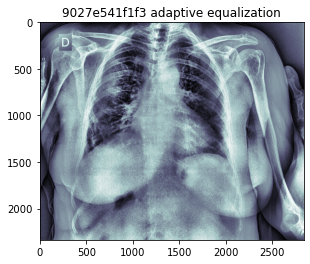

In [29]:
plt.imshow(img_adapteq, cmap=plt.cm.bone)
plt.title(os.path.basename(train_imgs[55].split('.')[0]) + ' adaptive equalization')

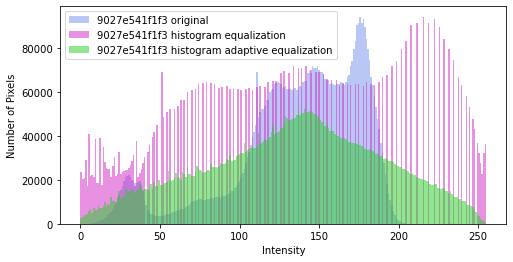

In [31]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(A.ravel(),bins=256, label=os.path.basename(train_imgs[55]).split('.')[0] + ' original', fc=(26/255, 71/255, 220/255, 0.3))
ax.hist(img_eq.ravel(),bins=256, label=os.path.basename(train_imgs[55]).split('.')[0] + ' histogram equalization', fc=(211/255, 36/255, 200/255, 0.5))
ax.hist(img_adapteq.ravel(),bins=256, label=os.path.basename(train_imgs[55]).split('.')[0] + ' histogram adaptive equalization', fc=(35/255, 209/255, 35/255, 0.5))

ax.set_ylabel('Number of Pixels')
ax.set_xlabel('Intensity')
ax.legend()
plt.show()

In [8]:
from master_lib.model.generator import DataGenerator

In [9]:
gen = DataGenerator(train_imgs[:100], equalization=1)

Generator created! Equalization: 1
